In [1]:
#import primary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')
import scipy
from scipy import stats

In [2]:
train=pd.read_csv('Big_train.csv')
test=pd.read_csv('Big_test.csv')

In [3]:
train_original=train.copy()
test_original=test.copy()

## variable Identification

In [4]:
train.shape , test.shape

((8523, 12), (5681, 11))

In [5]:
# the target variable data type 'Item_Outlet_Sales' is 'float64', hence we are facing a regression problem
# two columns comprises nan values
# feature are devided into two segments, Item features and outlet features
# MRP stands for :A maximum retail price (MRP), is a manufacturer calculated price that is the highest price that can be charged for a product sold in India and Bangladesh
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Univariate Analysis

In [7]:
# excluding Item_Identifier and Outlet_Identifier from features
# segmenting variable to numerical and categorical variables
# Outlet_Establishment_Year can be categorized as a Datetime variable later
org_features=[f for f in train.columns if f not in ['Item_Identifier', 'Outlet_Identifier']]
num=[f for f in org_features if train[f].dtype!='O']
cat=[f for f in org_features if train[f].dtype=='O']
target=train['Item_Outlet_Sales']

In [8]:
print('number of unique Item ID: {} , number of Outlets: {}'.format(len(train['Item_Identifier'].unique()), 
                                                                    len(train['Outlet_Identifier'].unique())))

number of unique Item ID: 1559 , number of Outlets: 10


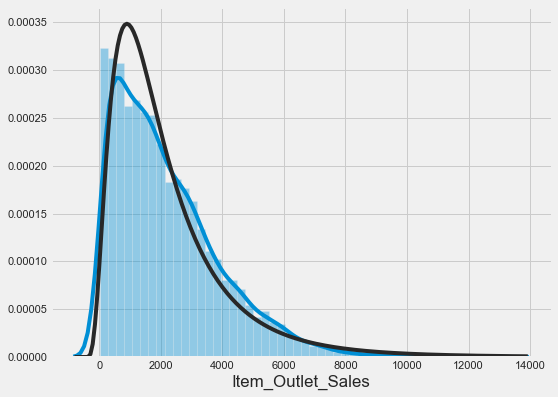

In [9]:
#Analysing Target Variable
plt.figure(figsize=(8, 6))
sns.distplot(train['Item_Outlet_Sales'], fit=stats.johnsonsu)
plt.show()
#Target Variable is positively skewed, also the presence of outliers is obvious

####  it is a right skewd variable and would need some data transformation to treat its skewness.



In [10]:
def distplot(frame, features):
    plt.figsize=(10, 6)
    for feature in features:
        if feature != 'Item_Outlet_Sales':
            plt.title(feature)
            sns.distplot(frame[feature])
            plt.show()   

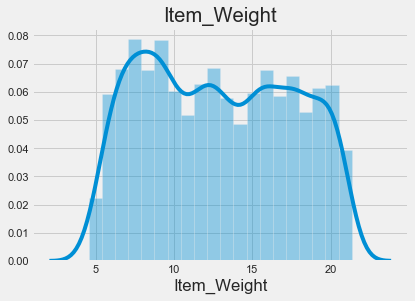

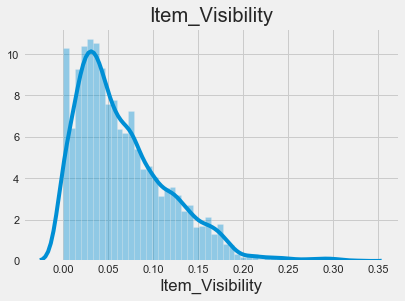

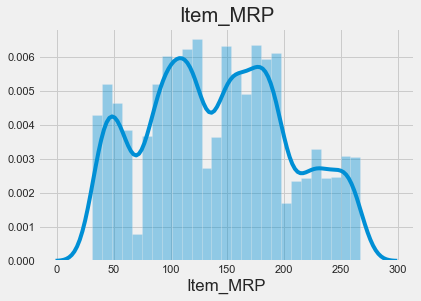

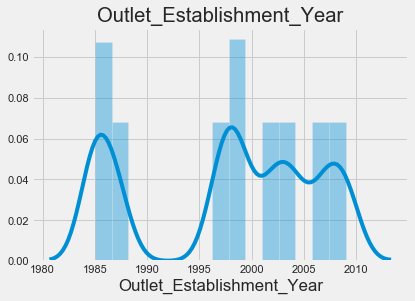

In [11]:
distplot(train, num)
# none of numerical values distibuted normaly, hence normalization is necessary.
# There seems to be no clear-cut pattern in Item_Weight.
# Outlet_Establishment_Year is a discrete variable. 
# We can clearly see 4 different distributions for Item_MRP, such an interesting insight!
# some values are zero for Item_Visibility feature, also it is right-skewed and should be transformed to curb its skewness.

In [12]:
#bins=[0,0.05,0.1,0.33]
#group=['Low', 'Average', 'High']
#train.Item_Visibility_bin= pd.cut(train.Item_Visibility, bins, labels=group)
#train.Item_Visibility_bin.value_counts().plot.bar(title='Item Visibility')
#plt.show()

In [13]:
for feature in cat:
    print('number of unique values for {} : {} \n {}'.format(feature,len(train[feature].unique()), train[feature].unique()))
# Item_Fat_Content has a number of duplicates with different names

number of unique values for Item_Fat_Content : 5 
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
number of unique values for Item_Type : 16 
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
number of unique values for Outlet_Size : 4 
 ['Medium' nan 'High' 'Small']
number of unique values for Outlet_Location_Type : 3 
 ['Tier 1' 'Tier 3' 'Tier 2']
number of unique values for Outlet_Type : 4 
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [14]:
# Since self values are not defined in mapping dictionary mapping.get(x, x) has been used
mapping={'Low Fat':'LF', 'low fat':'LF', 'Regular':'Reg', 'reg':'Reg'}
train['Item_Fat_Content']= train['Item_Fat_Content'].map(lambda x: mapping.get(x,x))
train.Item_Fat_Content.unique()

array(['LF', 'Reg'], dtype=object)

In [15]:
test['Item_Fat_Content']= test['Item_Fat_Content'].map(lambda x: mapping.get(x,x))
test['Item_Fat_Content'].unique()

array(['LF', 'Reg'], dtype=object)

In [16]:
def barplot(frame, features):
    for feature in features:
        frame[feature].value_counts(normalize=True).plot.bar(title=feature)
        plt.show()

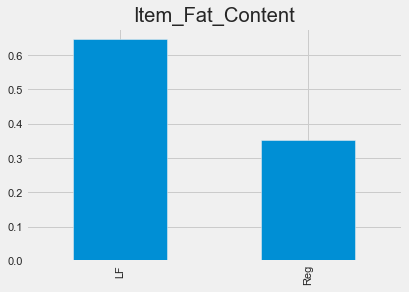

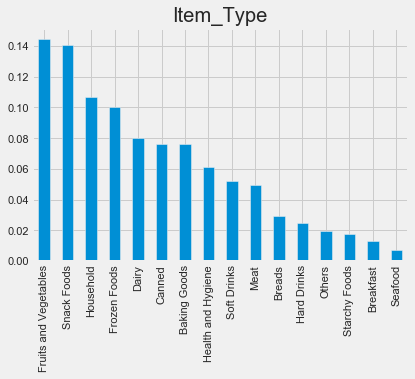

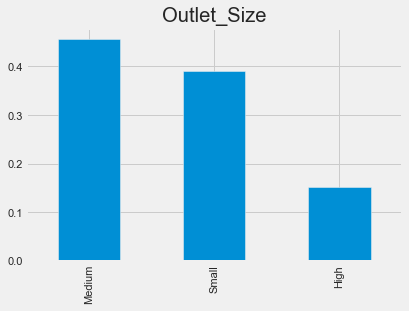

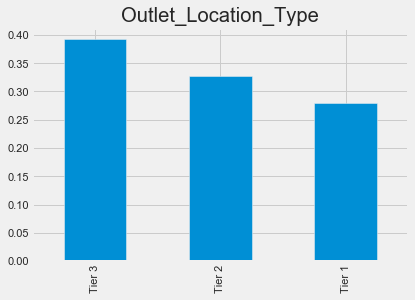

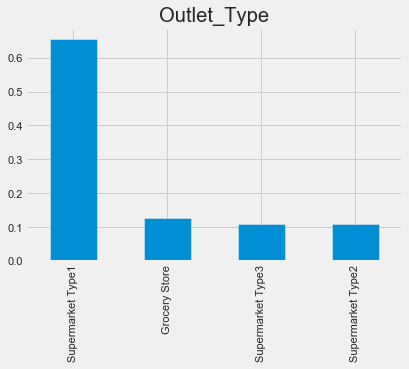

In [17]:
barplot(train, cat)
# LF is roughly twice the value of Reg, however not all items include fat such as housholds, hygiene, etc.
# Fruits and vegetables followed by household and frozen foods incorporate a significant volume of items
# many of the outlets are medium-size, followed by small-size outlets
# most of the outlets are loccated in tier 3 cities, I assume tier 3 allocates to greater and more croweded cities
# most of the outlet types are supermarkets type 1

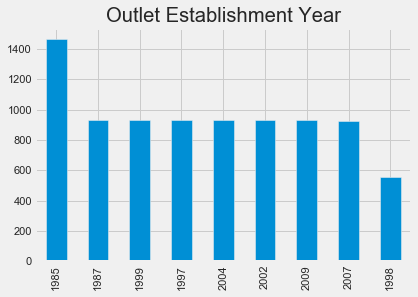

In [18]:
train.Outlet_Establishment_Year.value_counts().plot.bar(title='Outlet Establishment Year')
plt.show()
# many of the outlets has been established in 1985 and only a few ones in 1998, there is no difference between others
# there is not a specific pattern in establishment year to extract a meaninful insight in respect of time, hence it's better
# to convert it to categorical data
train['Outlet_Establishment_Year']=train['Outlet_Establishment_Year'].astype('object')
test['Outlet_Establishment_Year']=test['Outlet_Establishment_Year'].astype('object')

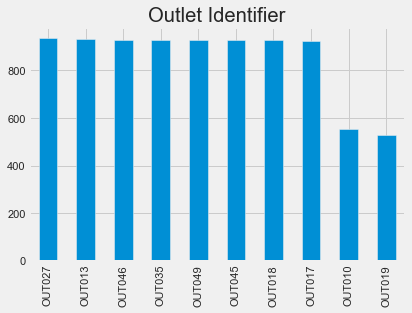

In [19]:
train.Outlet_Identifier.value_counts().plot.bar(title='Outlet Identifier')
plt.show()
# Outlet ID 10 and 19 repeated less than the others

In [20]:
train['Item_Identifier'].value_counts()
#Abbreviations in Item_Identifier might refer to specific type of products, lets investigate it later 

FDW13    10
FDG33    10
NCB18     9
NCI54     9
NCF42     9
         ..
FDO33     1
DRF48     1
FDY43     1
FDN52     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

# Bivariate Analysis

## continuous-continuous: 
### analyzing continuous variables with respect to target variable

In [21]:
def scatter(frame, features):
    for feature in features:
        if feature !='Item_Outlet_Sales':
            plt.figure(figsize=(8,6))
            plt.title(feature)
            plt.scatter(frame[feature], target)
            plt.show()

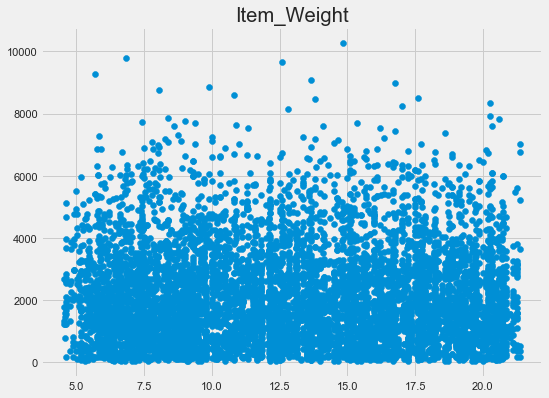

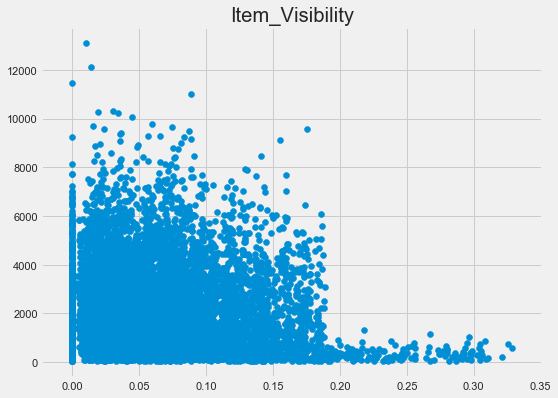

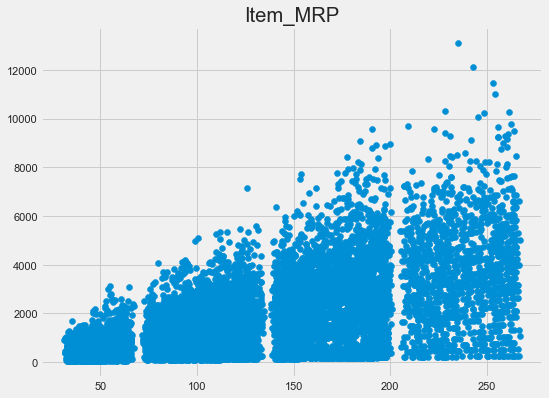

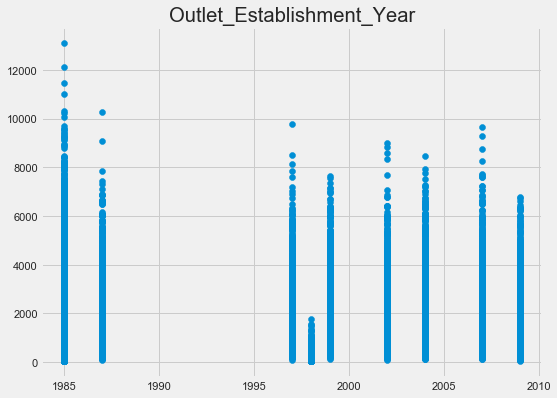

In [22]:
scatter(train, num)
# there is no clear relationship between Item_weight, Item_Visibiity and target varibale, further investigation is required.
# zero value for Item_Visibility is questionable, more investigation is required
# there is an interestng pattern between Item_MRP and target variable, also it seems binning is necessary for this feature

#### Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.
#### In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.
#### In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.


In [23]:
def violinplot(frame, features, y):
    for feature in features:
        plt.figure(figsize=(8, 6))
        sns.violinplot(frame[feature], y)
        plt.xticks(rotation=90)
        plt.show()

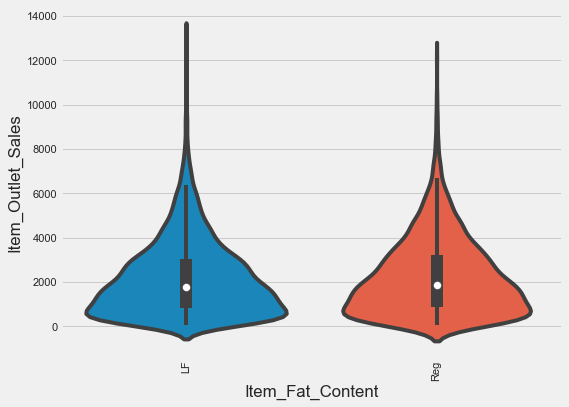

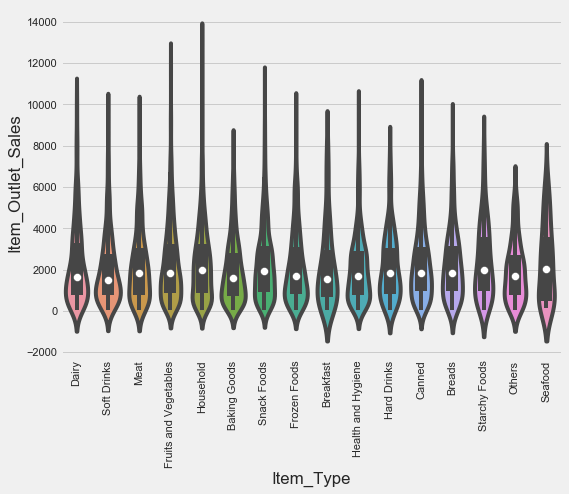

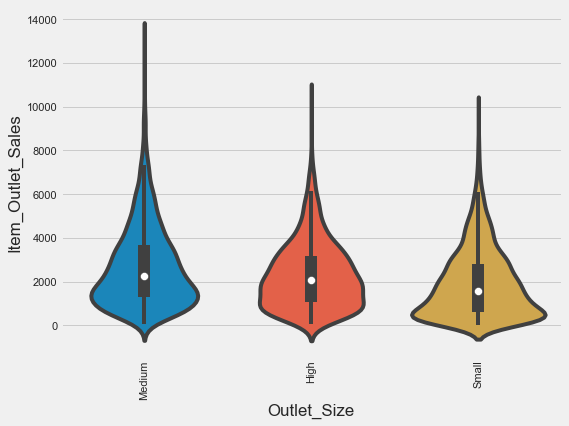

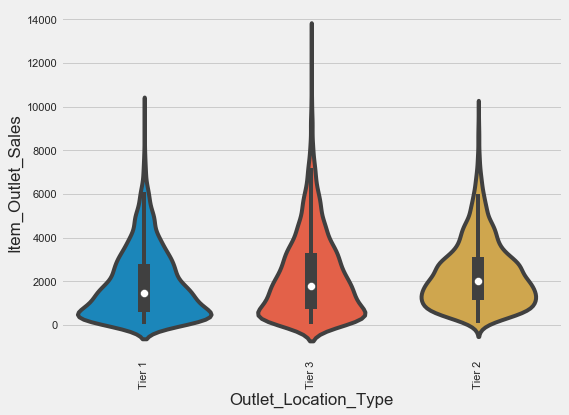

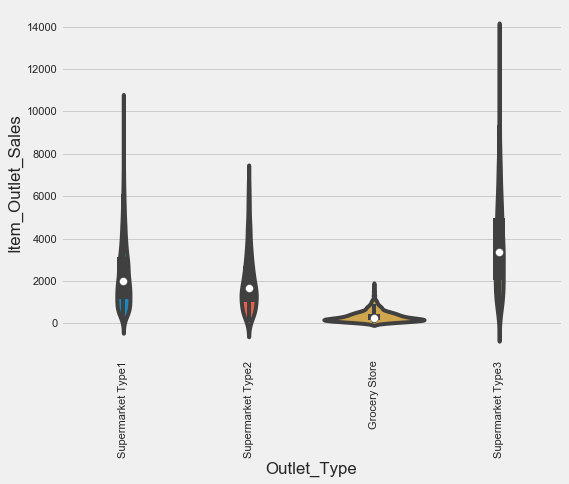

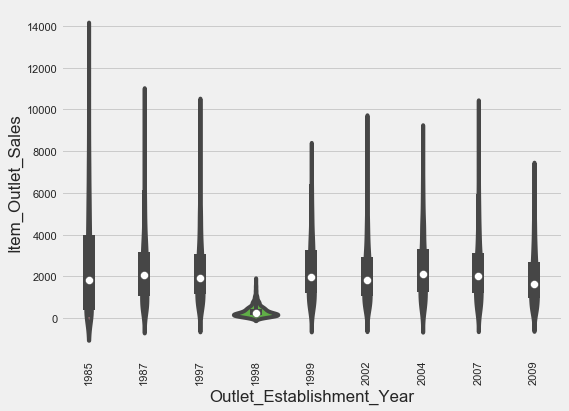

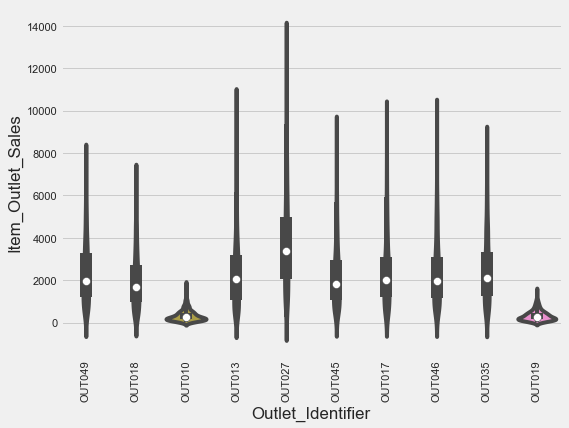

In [24]:
lst_1=cat+['Outlet_Establishment_Year', 'Outlet_Identifier']
violinplot(train, lst_1, target)

#### Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.
#### In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.
#### Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.
#### The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier. they are both grocery stores, OUT019 is a small size outlet, however there's no information regarding the size of OUT010, given pattern similarity I think OUT010 is a small-size Outlet as well.

In [25]:
#it seems first two letters of Item_Identifier refer to type of Items, FD: Food, DR: Drink and NC: non-Consumbale
# I copy the dataframe so no changes will be applied to it during the EDA
data=train.copy()
data['Item_Category']=data['Item_Identifier'].apply(lambda row: row[:2])
data['Item_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

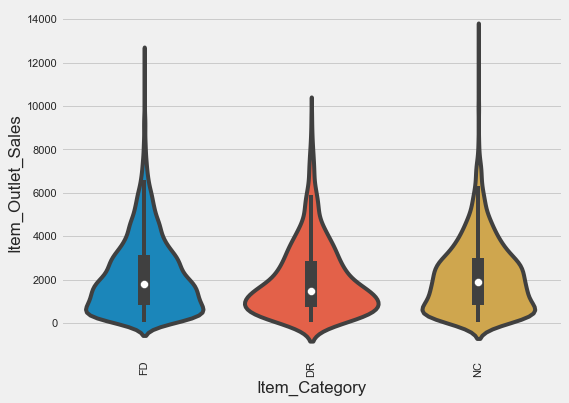

In [26]:
plt.figure(figsize=(8, 6))
sns.violinplot(data['Item_Category'], target)
plt.xticks(rotation=90)

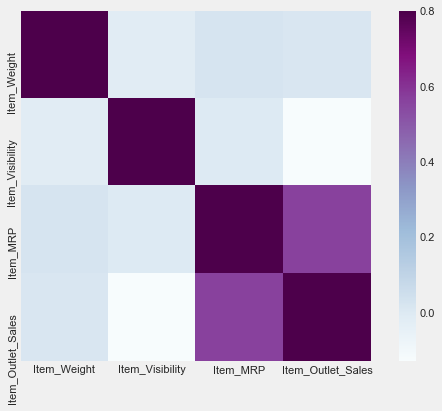

In [27]:
matrix=train.corr()
plt.figure(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap='BuPu')
plt.show()

### there is an obvious correlation between Item_MRP and Item_Outlet_Sales

In [28]:
# I want to look for relationships between variables more deeply,
def lmplot(frame, x, y, hue):
    data=frame.groupby([hue, x]).agg({y:np.median}).reset_index()
    sns.lmplot(x, y, data=data, fit_reg=False, hue=hue, aspect=2.5)
    plt.show

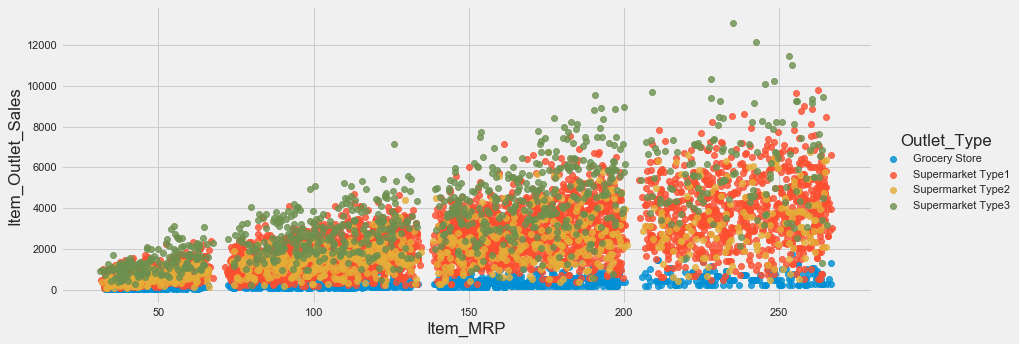

In [29]:
#lmplot(train, 'Item_Weight', 'Item_Outlet_Sales', 'Item_Type')
#lmplot(train, 'Item_Weight', 'Item_Outlet_Sales', 'Item_Fat_Content')
#lmplot(data, 'Item_Weight', 'Item_Outlet_Sales', 'Item_Category')
#lmplot(data, 'Item_MRP', 'Item_Outlet_Sales', 'Item_Category')
#lmplot(train,'Item_MRP', 'Item_Outlet_Sales','Item_Type')
#lmplot(train, 'Item_MRP','Item_Outlet_Sales', 'Outlet_Location_Type')
lmplot(train, 'Item_MRP','Item_Outlet_Sales', 'Outlet_Type')

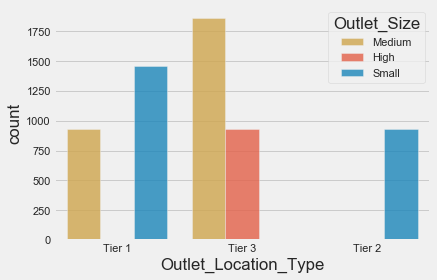

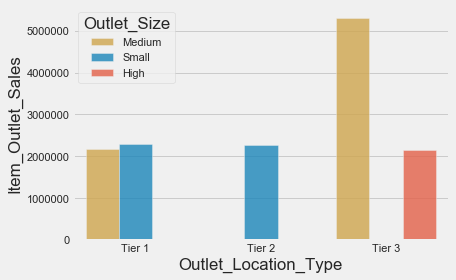

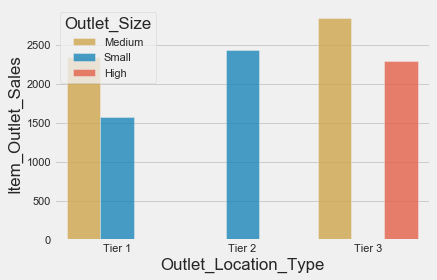

In [30]:
palette={'Small':'C0', 'Medium':'C2', 'High':'C1'}

sns.countplot('Outlet_Location_Type', hue='Outlet_Size', data=train, alpha=0.8, palette=palette )
plt.show()

Location_Size_Sales_Sum=train.groupby(['Outlet_Location_Type', 'Outlet_Size']).agg({'Item_Outlet_Sales':np.sum}).reset_index()
sns.barplot('Outlet_Location_Type', 'Item_Outlet_Sales', hue='Outlet_Size', 
            data= Location_Size_Sales_Sum, alpha=0.8, palette=palette)
plt.show()

Location_Size_Sales_Mean=train.groupby(['Outlet_Location_Type', 'Outlet_Size']).agg({'Item_Outlet_Sales':np.mean}).reset_index()
sns.barplot('Outlet_Location_Type', 'Item_Outlet_Sales', hue='Outlet_Size',
            data= Location_Size_Sales_Mean, alpha=0.8, palette=palette)
plt.show()

### Tier1 cities posess Medium & Small-size outlets, small-size outlets have sold more items, while Items in Medium-size have higher avg price
### Tier2 cities posses Only Small-size outlets
### Tier3 cities posses Medium and High-size outlets, medium-size outlets have sold more items, avg price is higher in those as well.

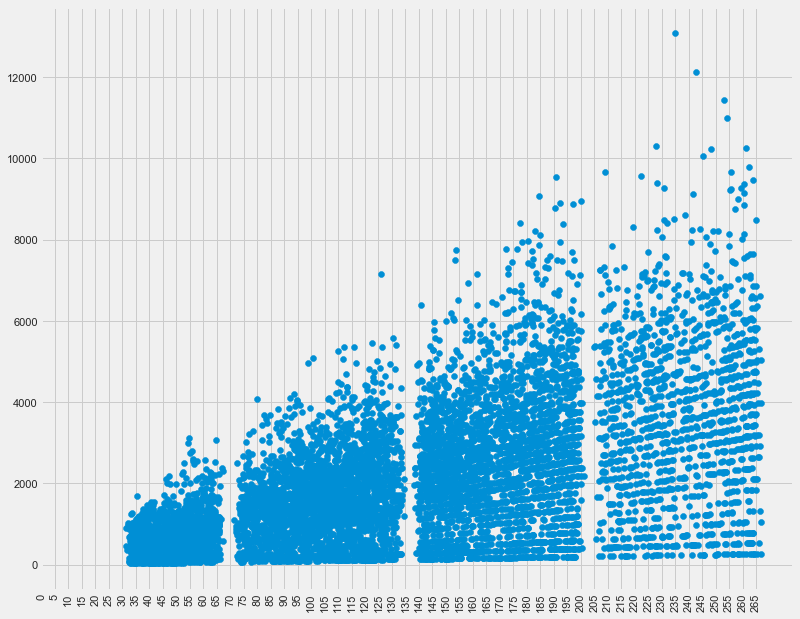

In [31]:
# lets find some insight regarding Item MRP which represents high correlation with target variable, but first we should bin the values and convert it to categorical
plt.figure(figsize=(12, 10))
plt.scatter(train['Item_MRP'], target)
plt.xticks(np.arange(0, np.max(train['Item_MRP']), 5), rotation=90)
plt.show()

In [32]:
bins=[0, 70, 135, 203, 267]
labels=['Low', 'Medium', 'High', 'Very High']

data['Item_MRP_bin']=pd.cut(data['Item_MRP'],  bins=bins, labels=labels)

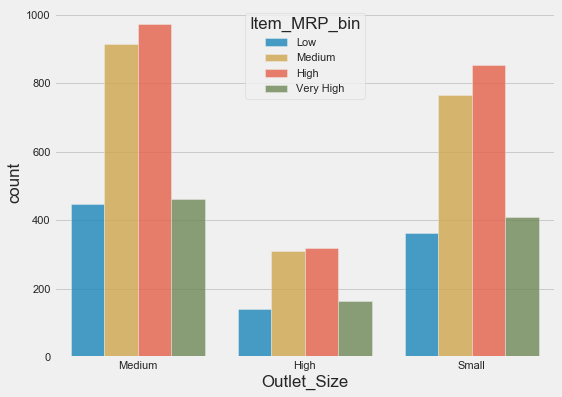

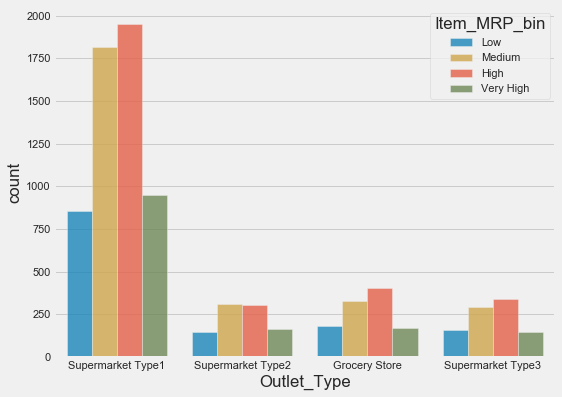

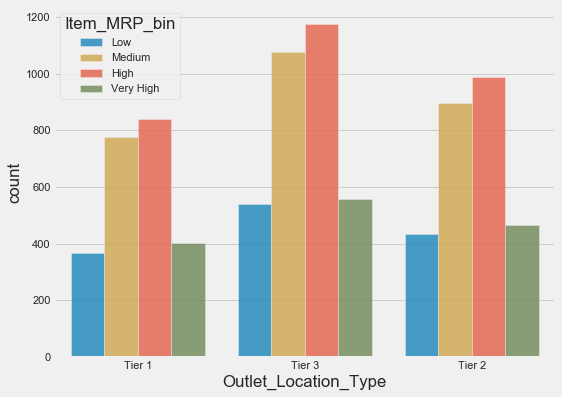

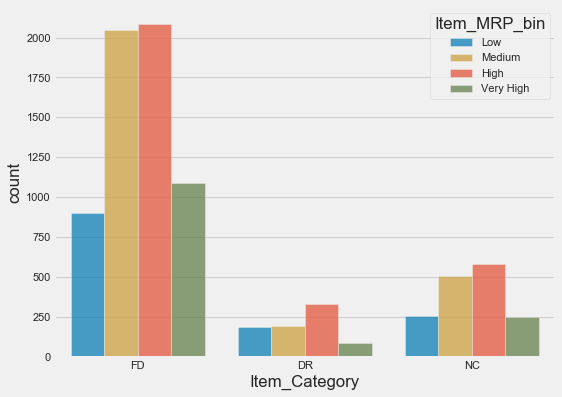

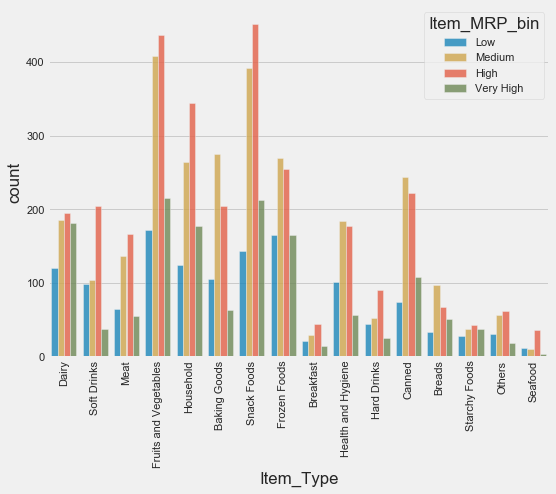

In [33]:
palette={'Low':'C0', 'Medium':'C2', 'High':'C1', 'Very High':'C3'}


plt.figure(figsize=(8,6))
sns.countplot('Outlet_Size', hue='Item_MRP_bin', data=data, alpha=0.8, palette=palette)
plt.show()

plt.figure(figsize=(8,6))
sns.countplot('Outlet_Type', hue='Item_MRP_bin', data=data, alpha=0.8, palette=palette)
plt.show()

plt.figure(figsize=(8,6))
sns.countplot('Outlet_Location_Type', hue='Item_MRP_bin', data=data, alpha=0.8, palette=palette)
plt.show()

plt.figure(figsize=(8,6))
sns.countplot('Item_Category', hue='Item_MRP_bin', data=data, alpha=0.8, palette=palette)
plt.show()

plt.figure(figsize=(8,6))
sns.countplot('Item_Type', hue='Item_MRP_bin', data=data, alpha=0.8, palette=palette)
plt.xticks(rotation=90)
plt.show()



### It seems Size, Type, Location and even Item's Category does not affect MRP, which means in all these features, Items with High price followed by Medium price have been sold more than others.

### the pattern is more or less the same for Item_Type, however, for baking goods, frozen foods, hygiene, canned, and breads, medium price items have been sold slightly more than high price.

## Imputing Missing Values

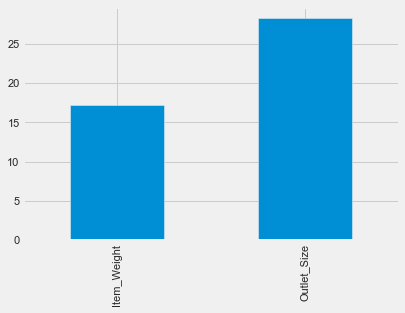

In [34]:
missing=train.isnull().sum()
missing=missing[missing>0]*100/len(train)
missing.plot(kind='bar')
plt.show()

In [35]:
# since Item_Identifier is a good indicator for deciding Item_weight, I will impute missing values with avg of weights for specific IDs.
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'))
# in order to avoid data leakage I'll do imputation separately
test['Item_Weight']=test['Item_Weight'].fillna(test.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'))
# yet the value for 4 items remained NA, hence I'll impute them again.
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [36]:
# since Location and tire of a city roughly determines the Outlet_Size, I'll use them to impute missing values
# both codes provide the same result:
train.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode).reset_index()
#train.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'].agg(lambda x: x.value_counts().index)

,Outlet_Location_Type,Outlet_Type,Outlet_Size
0,Tier 1,Grocery Store,Small
1,Tier 1,Supermarket Type1,"[Medium, Small]"
2,Tier 2,Supermarket Type1,Small
3,Tier 3,Grocery Store,[]
4,Tier 3,Supermarket Type1,High
5,Tier 3,Supermarket Type2,Medium
6,Tier 3,Supermarket Type3,Medium


In [37]:
train['Outlet_Size_na']= np.where(train['Outlet_Size'].isnull(), 1, 0)
train.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size_na'].sum().reset_index()

,Outlet_Location_Type,Outlet_Type,Outlet_Size_na
0,Tier 1,Grocery Store,0
1,Tier 1,Supermarket Type1,0
2,Tier 2,Supermarket Type1,1855
3,Tier 3,Grocery Store,555
4,Tier 3,Supermarket Type1,0
5,Tier 3,Supermarket Type2,0
6,Tier 3,Supermarket Type3,0


In [38]:
## having both tables we can decide, if the outlet is in tier2 and it is a supermarket type 1 it is most probabely 'small'
## if it's located in tier3 and is a Grocery store it is 'medium'

train.loc[(train['Outlet_Location_Type']== 'Tier 2') & (train['Outlet_Type']== 'Supermarket Type1'), 
                              'Outlet_Size']= 'Small'
train.loc[(train['Outlet_Location_Type']== 'Tier 3') & (train['Outlet_Type']== 'Grocery Store'), 
                              'Outlet_Size']= 'Medium'

In [39]:
test['Outlet_Size_na']= np.where(test['Outlet_Size'].isnull(), 1, 0)
test.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size_na'].sum().reset_index()

,Outlet_Location_Type,Outlet_Type,Outlet_Size_na
0,Tier 1,Grocery Store,0
1,Tier 1,Supermarket Type1,0
2,Tier 2,Supermarket Type1,1236
3,Tier 3,Grocery Store,370
4,Tier 3,Supermarket Type1,0
5,Tier 3,Supermarket Type2,0
6,Tier 3,Supermarket Type3,0


In [40]:
test.loc[(test['Outlet_Location_Type']== 'Tier 2') & (test['Outlet_Type']== 'Supermarket Type1'), 
                              'Outlet_Size']= 'Small'
test.loc[(test['Outlet_Location_Type']== 'Tier 3') & (test['Outlet_Type']== 'Grocery Store'), 
                              'Outlet_Size']= 'Medium'

In [41]:
# the other issue is the exsistance of zero value for 526 Items in Item_Visibility feature
# it does not make sense since if an item is not visible, that means no one can buy it, unless the item has been stored in the warehouse
# or the zero value has been entered by mistake
train.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [42]:
# to impute zero values with new ones we can use Item_Identifier since, it is highly probable that Items with the same IDs have the same visibility value
train['Item_Visibility']=train['Item_Visibility'].replace(0, train.groupby(['Item_Identifier'])['Item_Visibility'].transform('mean'))
test['Item_Visibility']=test['Item_Visibility'].replace(0, test.groupby(['Item_Identifier'])['Item_Visibility'].transform('mean'))

## Feature Engineering
#### In this section we will create the following new features:

##### Item_Type_new: Broader categories for the variable Item_Type.
##### Item_category: Categorical variable derived from Item_Identifier.
##### Outlet_Years: Years of operation for outlets.
##### price_per_unit_wt: Item_MRP/Item_Weight
##### Item_MRP_clusters: Binned feature for Item_MRP.

#### We can have a look at the Item_Type variable and classify the categories into perishable and non_perishable as per our understanding and make it into a new feature.

In [43]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [44]:
def perish(x, l1, l2):
    if x in l1:
        return 'Perishable'
    elif x in l2:
        return 'Non-Perishable'
    else:
        return 'Not Sure'

perishable=('Fruits and Vegetables','Snack Foods','Dairy','Meat','Breads','Breakfast','Seafood')
non_perishable=('Household','Frozen Foods ','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Hard Drinks','Starchy Foods')

train['Item_Type_New']= train.Item_Type.apply(lambda x: perish(x, perishable, non_perishable))
test['Item_Type_New']= test.Item_Type.apply(lambda x: perish(x, perishable, non_perishable))

In [45]:
#NC stands for non-consumable
#FD for food & DR for drinks
train['Item_Category']=train.Item_Identifier.apply(lambda x: x[0:2])
test['Item_Category']=test.Item_Identifier.apply(lambda x: x[0:2])

In [46]:
# now we can use Item_Category to rectify Item_Fat_Content since non-consumble products such as houshold does not contain fat
train.loc[train.Item_Category=='NC', 'Item_Fat_Content']='Non-Edible'
test.loc[test.Item_Category=='NC', 'Item_Fat_Content']='Non-Edible'

In [47]:
train['Outlet_Age']=train.Outlet_Establishment_Year.apply(lambda x: 2020-x)
test['Outlet_Age']=test.Outlet_Establishment_Year.apply(lambda x: 2020-x)

In [48]:
train['Price_Per_Unit_Wt']=train.Item_MRP/train.Item_Weight
test['Price_Per_Unit_Wt']=test.Item_MRP/test.Item_Weight

In [49]:
# considering visibility factor in MRP
train['MRP_Visible']=train['Item_MRP']*train['Item_Visibility']
test['MRP_Visible']=test['Item_MRP']*test['Item_Visibility']

In [50]:
bins=[0, 70, 135, 203, 267]
labels=['Low', 'Medium', 'High', 'Very High']

train['Item_MRP_bin']=pd.cut(train['Item_MRP'],  bins=bins, labels=labels)
test['Item_MRP_bin']=pd.cut(test['Item_MRP'],  bins=bins, labels=labels)

## Encoding categorical variables

### Label encoding for ordinal
### One Hot encoding for categorical

In [51]:
def labelencoder1(x):
    if x=='Small':
        return int(1)
    elif x=='Medium':
        return int(2)
    elif x=='High':
        return int(3)
train['Outlet_Size_lab']=train.Outlet_Size.apply(lambda x: labelencoder1(x))
test['Outlet_Size_lab']=test.Outlet_Size.apply(lambda x: labelencoder1(x))
train.Outlet_Size_lab.value_counts(), train.Outlet_Size.value_counts()

(1    4243
 2    3348
 3     932
 Name: Outlet_Size_lab, dtype: int64,
 Small     4243
 Medium    3348
 High       932
 Name: Outlet_Size, dtype: int64)

In [52]:
def labelencoder2(x):
    if x=='Tier 3':
        return int(1)
    elif x=='Tier 2':
        return int(2)
    elif x=='Tier 1':
        return int(3)
train['Outlet_Location_Type_lab']=train.Outlet_Location_Type.apply(lambda x: labelencoder2(x))
test['Outlet_Location_Type_lab']=test.Outlet_Location_Type.apply(lambda x: labelencoder2(x))
train.Outlet_Location_Type.value_counts(), train.Outlet_Location_Type_lab.value_counts()

(Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type, dtype: int64,
 1    3350
 2    2785
 3    2388
 Name: Outlet_Location_Type_lab, dtype: int64)

In [53]:
def labelencoder3(x):
    if x=='Non-Edible':
        return int(1)
    elif x=='LF':
        return int(2)
    elif x=='Reg':
        return int(3)
    
train['Item_Fat_Content_lab']=train.Item_Fat_Content.apply(lambda x: labelencoder3(x))
test['Item_Fat_Content_lab']=test.Item_Fat_Content.apply(lambda x: labelencoder3(x))
train.Item_Fat_Content_lab.value_counts(), train.Item_Fat_Content.value_counts()

(2    3918
 3    3006
 1    1599
 Name: Item_Fat_Content_lab, dtype: int64,
 LF            3918
 Reg           3006
 Non-Edible    1599
 Name: Item_Fat_Content, dtype: int64)

In [54]:
def labelencoder4(x):
    if x== 'Low':
        return int(1)
    elif x== 'Medium':
        return int(2)
    elif x== 'High':
        return int(3)
    else:
        return int(4)
train['Item_MRP_bin_lab']=train['Item_MRP_bin'].apply(lambda x: labelencoder4(x))
test['Item_MRP_bin_lab']=test['Item_MRP_bin'].apply(lambda x: labelencoder4(x))
train['Item_MRP_bin'].value_counts(), train['Item_MRP_bin_lab'].value_counts()

(High         3002
 Medium       2751
 Very High    1429
 Low          1341
 Name: Item_MRP_bin, dtype: int64,
 3    3002
 2    2751
 4    1429
 1    1341
 Name: Item_MRP_bin_lab, dtype: int64)

In [55]:
def labelencoder5(x):
    if x== 'Grocery Store':
        return int(1)
    elif x== 'Supermarket Type1':
        return int(2)
    elif x== 'Supermarket Type2':
        return int(3)
    else:
        return int(4)
train['Outlet_Type_lab']=train['Outlet_Type'].apply(lambda x: labelencoder5(x))
test['Outlet_Type_lab']=test['Outlet_Type'].apply(lambda x: labelencoder5(x))
train['Outlet_Type'].value_counts(), train['Outlet_Type_lab'].value_counts()

(Supermarket Type1    5577
 Grocery Store        1083
 Supermarket Type3     935
 Supermarket Type2     928
 Name: Outlet_Type, dtype: int64,
 2    5577
 1    1083
 4     935
 3     928
 Name: Outlet_Type_lab, dtype: int64)

In [56]:
train.drop(columns=['Outlet_Location_Type','Outlet_Size', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size_na',
                   'Item_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type', 'Item_MRP_bin'], inplace=True)
test.drop(columns=['Outlet_Location_Type','Outlet_Size', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size_na',
                   'Item_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type', 'Item_MRP_bin'], inplace=True)

In [57]:
dummy_cols=[f for f in train.columns if train[f].dtype=='O']
ohe_train=pd.get_dummies(train[dummy_cols])
ohe_test=pd.get_dummies(test[dummy_cols])


In [58]:
ohe_test.shape, ohe_train.shape, train.shape

((5681, 32), (8523, 32), (8523, 15))

In [59]:
train.drop(dummy_cols,axis=1, inplace=True)
train=pd.concat([train, ohe_train], axis=1)

test.drop(dummy_cols, axis=1, inplace=True)
test=pd.concat([test, ohe_test], axis=1)
train.shape, test.shape

((8523, 43), (5681, 42))

In [60]:
train.head()

,Item_Weight,Item_Visibility,Item_Outlet_Sales,Outlet_Age,Price_Per_Unit_Wt,MRP_Visible,Outlet_Size_lab,Outlet_Location_Type_lab,Item_Fat_Content_lab,Item_MRP_bin_lab,...,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Type_New_Non-Perishable,Item_Type_New_Not Sure,Item_Type_New_Perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,9.30,0.016047,3735.1380,21,26.861204,4.008763,2,3,2,4,...,0,0,0,1,0,0,1,0,1,0
1,5.92,0.019278,443.4228,11,8.153581,0.930544,2,1,3,1,...,0,0,0,0,1,0,0,1,0,0
2,17.50,0.016760,2097.2700,21,8.092457,2.373528,2,3,2,3,...,0,0,0,1,0,0,1,0,1,0
3,19.20,0.015274,732.3800,22,9.484115,2.781260,2,1,3,3,...,0,0,0,0,0,0,1,0,1,0
4,8.93,0.008082,994.7052,33,6.031512,0.435316,3,1,1,1,...,0,0,0,0,1,0,0,0,0,1


## Feature Selection
#### in order to avoid multicollinearity we should drop highly correlated columns or diminish the influence of them through application of lasso regression

In [61]:
train['Item_MRP_bin_lab']=train['Item_MRP_bin_lab'].astype('int64')

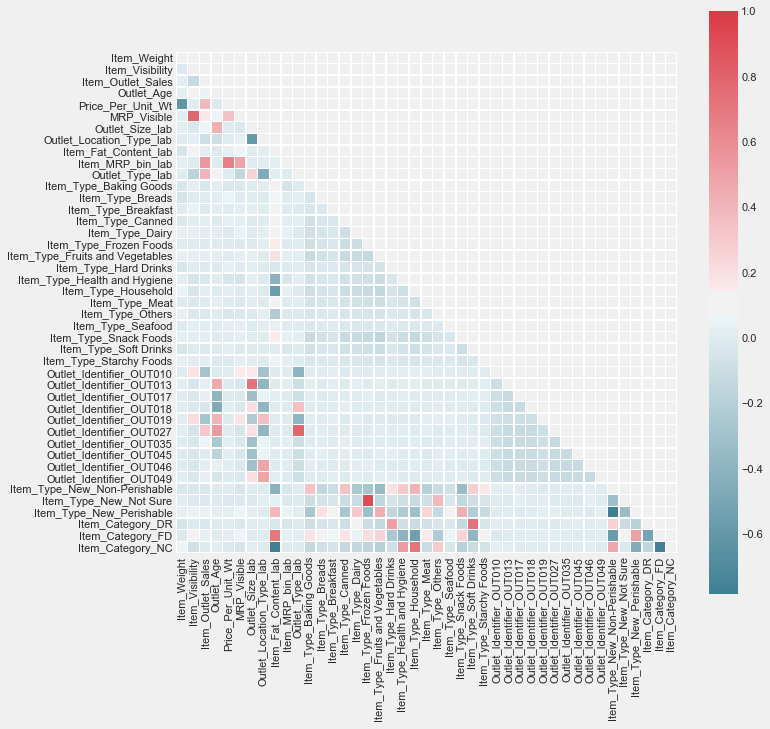

In [62]:
plt.figure(1, figsize=(10,10))
corr_matrix=train.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix,mask=mask, 
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.show()

In [63]:
train.drop(['MRP_Visible', 'Item_Weight'], axis=1, inplace=True)
test.drop(['MRP_Visible', 'Item_Weight'], axis=1, inplace=True)

## preprocessing
### removing skewness

In [64]:
train.head()

,Item_Visibility,Item_Outlet_Sales,Outlet_Age,Price_Per_Unit_Wt,Outlet_Size_lab,Outlet_Location_Type_lab,Item_Fat_Content_lab,Item_MRP_bin_lab,Outlet_Type_lab,Item_Type_Baking Goods,...,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Type_New_Non-Perishable,Item_Type_New_Not Sure,Item_Type_New_Perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,0.016047,3735.1380,21,26.861204,2,3,2,4,2,0,...,0,0,0,1,0,0,1,0,1,0
1,0.019278,443.4228,11,8.153581,2,1,3,1,3,0,...,0,0,0,0,1,0,0,1,0,0
2,0.016760,2097.2700,21,8.092457,2,3,2,3,2,0,...,0,0,0,1,0,0,1,0,1,0
3,0.015274,732.3800,22,9.484115,2,1,3,3,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0.008082,994.7052,33,6.031512,3,1,1,1,2,0,...,0,0,0,0,1,0,0,0,0,1


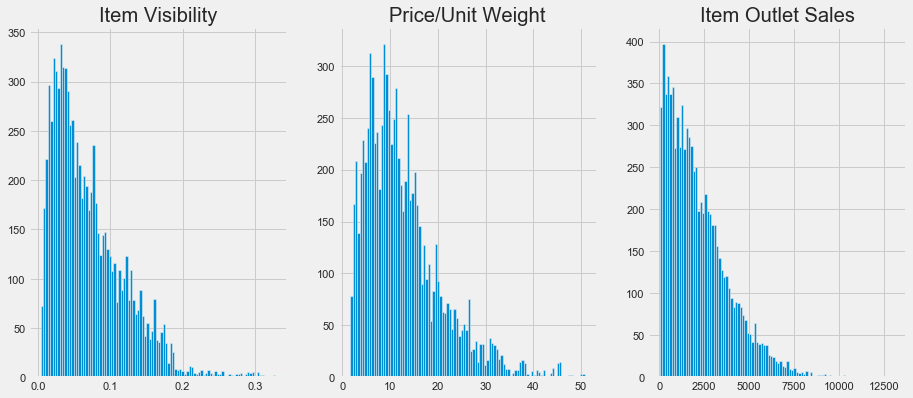

In [65]:
fig, ax=plt.subplots(1,figsize=(14,6))
plt.subplot(131)
plt.title('Item Visibility')
train.Item_Visibility.hist(bins=100)
plt.subplot(132)
plt.title('Price/Unit Weight')
train.Price_Per_Unit_Wt.hist(bins=100)
plt.subplot(133)
plt.title('Item Outlet Sales')
train.Item_Outlet_Sales.hist(bins=100) #it's the target variable we shouldn't change it.
plt.show()

In [66]:
#Since data is positively skewed, the best practice is to remove skewness through log which penalize higher values
train.Item_Visibility=np.log(train.Item_Visibility)
test.Item_Visibility=np.log1p(test.Item_Visibility)
train.Price_Per_Unit_Wt=np.log(train.Price_Per_Unit_Wt)
test.Price_Per_Unit_Wt=np.log(test.Price_Per_Unit_Wt)
train.Item_Outlet_Sales=np.log(train.Item_Outlet_Sales)

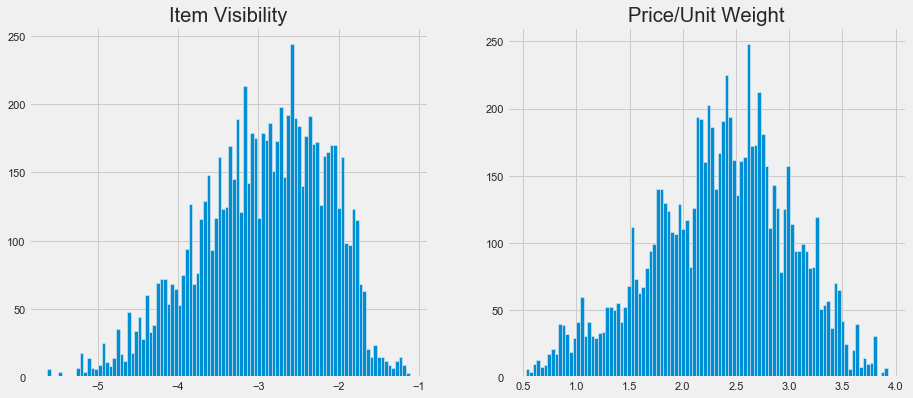

In [67]:
fig, ax=plt.subplots(1,figsize=(14,6))
plt.subplot(121)
plt.title('Item Visibility')
train.Item_Visibility.hist(bins=100)
plt.subplot(122)
plt.title('Price/Unit Weight')
train.Price_Per_Unit_Wt.hist(bins=100)
plt.show()

## Normalization

In [68]:
X_train=train.loc[:, train.columns!='Item_Outlet_Sales']
y=train['Item_Outlet_Sales']

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [70]:
# Since we have negative values for Item_Visibility, first, I will standardize values and then normalize them. 
st_scaler=StandardScaler()
norm_scaler_1=MinMaxScaler()
train_vis=(train['Item_Visibility'].values).reshape(-1,1)
train_vis_st=((pd.DataFrame(st_scaler.fit_transform(train_vis))).values).reshape(-1,1)
train_vis_norm=pd.DataFrame(norm_scaler_1.fit_transform(train_vis_st), columns=['Item_Visibility'])

test_vis=(test['Item_Visibility'].values).reshape(-1,1)
test_vis_st=((pd.DataFrame(st_scaler.transform(test_vis))).values).reshape(-1,1)
test_vis_norm=pd.DataFrame(norm_scaler_1.transform(test_vis_st), columns=['Item_Visibility'])

In [71]:
# now we can normalize the rest of numerical predictors
norm_scaler_2=MinMaxScaler()
train_num=X_train.iloc[:,1:8].values
test_num=test.iloc[:, 1:8].values
train_num_norm=pd.DataFrame(norm_scaler_2.fit_transform(train_num), columns=X_train.iloc[:,1:8].columns)
test_num_norm=pd.DataFrame(norm_scaler_2.transform(test_num), columns=test.iloc[:, 1:8].columns)

In [72]:
# Finally it's time to normalize target variabe
norm_scaler_3=MinMaxScaler()
target=y.values.reshape(-1,1)
target_norm=pd.DataFrame(norm_scaler_3.fit_transform(target), columns=['Item_Outlet_Sales'])

In [73]:
# now we should concate all dataframes.
train=pd.concat([train_vis_norm, train_num_norm,X_train.iloc[:, 8:], target_norm ], axis=1)
test=pd.concat([test_vis_norm, test_num_norm, test.iloc[:, 8:]], axis=1)

## Model Building

### to Build a model, I'll try different algorithms and evaluate their performances by RMSE, Finally I'll apply a stacking method which combines all the algorithms to see if I get a better result 

In [74]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std

from matplotlib import pyplot

In [75]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1:]

In [76]:
# first I define a stacking function
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    level0.append(('ada', AdaBoostRegressor()))
    level0.append(('xgb', XGBRegressor()))
    level0.append(('rf', RandomForestRegressor()))
    level0.append(('la', Lasso()))
    level0.append(('rd', Ridge()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [77]:
# next I define a function to evaluate different models
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    neg_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    scores= np.sqrt(abs(neg_scores))
    return scores

In [78]:
# here I define function to create a dictionary of desired algorithms
def get_models():
    models = dict()
    models['lr'] = LinearRegression()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['ada'] = AdaBoostRegressor()
    models['xgb']= XGBRegressor()
    models['rf']= RandomForestRegressor()
    models['la']= Lasso()
    models['rd']= Ridge()
    models['stacking'] = get_stacking()
    return models

In [ ]:
# creating a dictionary of models
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## It's obvious that stacking improved the preformance of the model, also linear regression and ridge algorithms perform quite good.
### the performance by stacking model might even progress if we tune parameters for each algorithm beforehand.

## Now it's time to predict sales for our test data and upload our submission to the contest.

In [80]:
model=get_stacking()
model.fit(X, y)
y_pred=model.predict(test)
submission=pd.read_csv('sample_submission')

# Importnant Note:
### after submitting my prediction to the solution checker for the first time, I got a notice telling submission file includes some negative values, which is quite non-sense since I am predicting sales figures.
### I googled the problem and found out that the application of Linear regression and Ridge might cause to get negative values in my prediction. why? since the algorithms are based on y=ax+b, which extrapolate predictions, that means it is possible that the interception for the equation to be negative, that means some values somewhere, some how would be predicted negative.
### How to solve this issue? well, there are two approaches, one way is to use another algorithm, and the other is to apply log transformation to independent variable (target value). I tried the second approch and then inversed both transformation (normalization, log transformation) for predicted values.

In [86]:
y_pred_inv=norm_scaler_3.inverse_transform(y_pred.reshape(-1,1))
y_pred_inv_exp=np.exp(y_pred_inv)

In [84]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,7.125195
1,FDW14,OUT017,7.312422
2,NCN55,OUT010,6.419935
3,FDQ58,OUT017,7.789930
4,FDY38,OUT027,8.545310


In [88]:
submission=submission.drop(['Item_Outlet_Sales'], axis=1)
submission['Item_Outlet_Sales']=y_pred_inv_exp
submission.to_csv('submission.csv', index=False)

## after submitting the submission file I've got the score of 1232.9415921557, which is not bad for a model without any hyperparameter tuning, however, it is possible to improve the performance of this model by tuning it's parameters.